In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [72]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

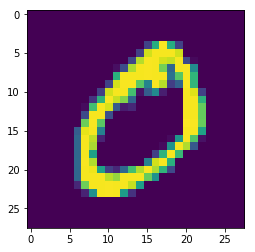

In [73]:
plt.imshow(X_treinamento[1])

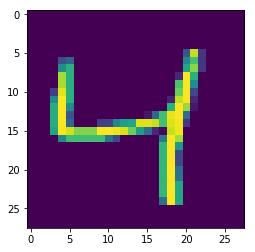

In [74]:
plt.imshow(X_treinamento[2])

Text(0.5, 1.0, '4')

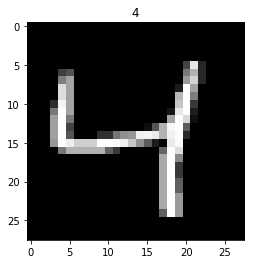

In [75]:
plt.imshow(X_treinamento[2], cmap = 'gray')
plt.title(y_treinamento[2])

Text(0.5, 1.0, '4')

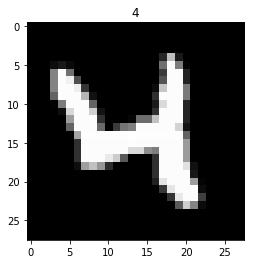

In [76]:
plt.imshow(X_treinamento[20], cmap = 'gray')
plt.title(y_treinamento[20])

Text(0.5, 1.0, '0')

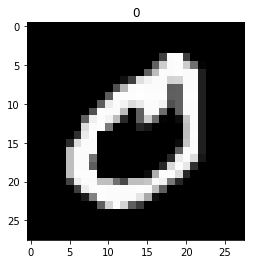

In [77]:
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [78]:
# Fazendo um reshape
X_treinamento = X_treinamento.reshape((len(X_treinamento),np.prod(X_treinamento.shape[1:])))

In [79]:
X_treinamento

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [80]:
len(X_treinamento)

60000

In [81]:
X_treinamento.shape

(60000, 784)

In [82]:
X_teste = X_teste.reshape((len(X_teste),np.prod(X_teste.shape[1:])))

In [83]:
X_teste.shape

(10000, 784)

In [84]:
X_teste.shape[1:]

(784,)

In [85]:
# Fazendo normalização nos dados
X_treinamento=X_treinamento.astype('float32')
X_teste=X_teste.astype('float32')

In [86]:
X_treinamento /= 255
X_teste /= 255

In [87]:
X_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
X_teste

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [89]:
y_treinamento=np_utils.to_categorical(y_treinamento,10)
y_teste=np_utils.to_categorical(y_teste,10)

In [90]:
y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [91]:
y_teste

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
modelo = Sequential()
modelo.add(Dense(units=64,activation='relu',input_dim=784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64,activation='relu',input_dim=784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64,activation='relu',input_dim=784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=10,activation='softmax'))

modelo.summary()

In [ ]:
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
historico = modelo.fit(X_treinamento,y_treinamento,epochs=20,validation_data=(X_teste,y_teste))

In [ ]:
historico.history.keys()
plt.plot(historico.history['val_loss'])
plt.plot(historico.history['val_accuracy'])

In [ ]:
plt.plot(historico.history['val_accuracy'])

In [ ]:
previsoes=modelo.predict(X_teste)

In [ ]:
previsoes

In [ ]:
y_teste_matriz = [np.argmax(t) for t in y_teste]

In [ ]:
y_previsoes_matriz = [np.argmax(t) for t in previsoes]

In [ ]:
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)

In [ ]:
confusao

In [ ]:
y_treinamento[20]
novo = X_treinamento[20]
novo=np.expand_dims(novo,axis=0)
pred=modelo.predict(novo)